                                                DECISION TREE CLASSIFICATION

Data Preparation: 

Import Libraries & Load the dataset :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
xls = pd.ExcelFile('heart_disease.xlsx')
print(xls.sheet_names)

['Description', 'Heart_disease']


In [29]:
heart = pd.read_excel(xls, sheet_name='Heart_disease')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [30]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


Basic Dataset Info :

In [25]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [26]:
heart.shape

(12, 2)

EXPLORATORY DATA ANALYSIS : 

Check Missing Values :

In [7]:
heart.isnull().sum()

age             987
Age in years    987
dtype: int64

Statistical Summary :

In [9]:
heart.describe()

,age,Age in years
count,12,12
unique,12,12
top,Gender,"Gender ; Male - 1, Female -0"
freq,1,1


Box Plot :

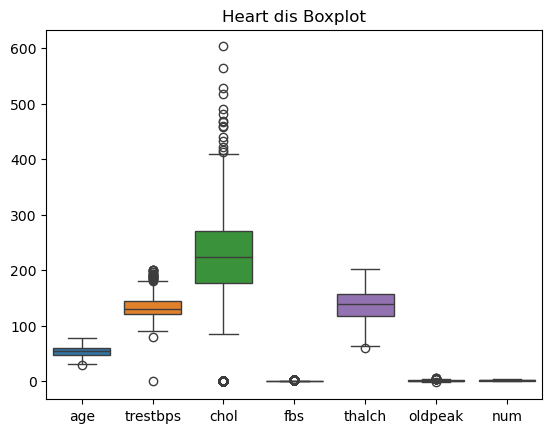

In [41]:
sns.boxplot(data=heart)
plt.title("Heart dis Boxplot")
plt.show()

Histogram :

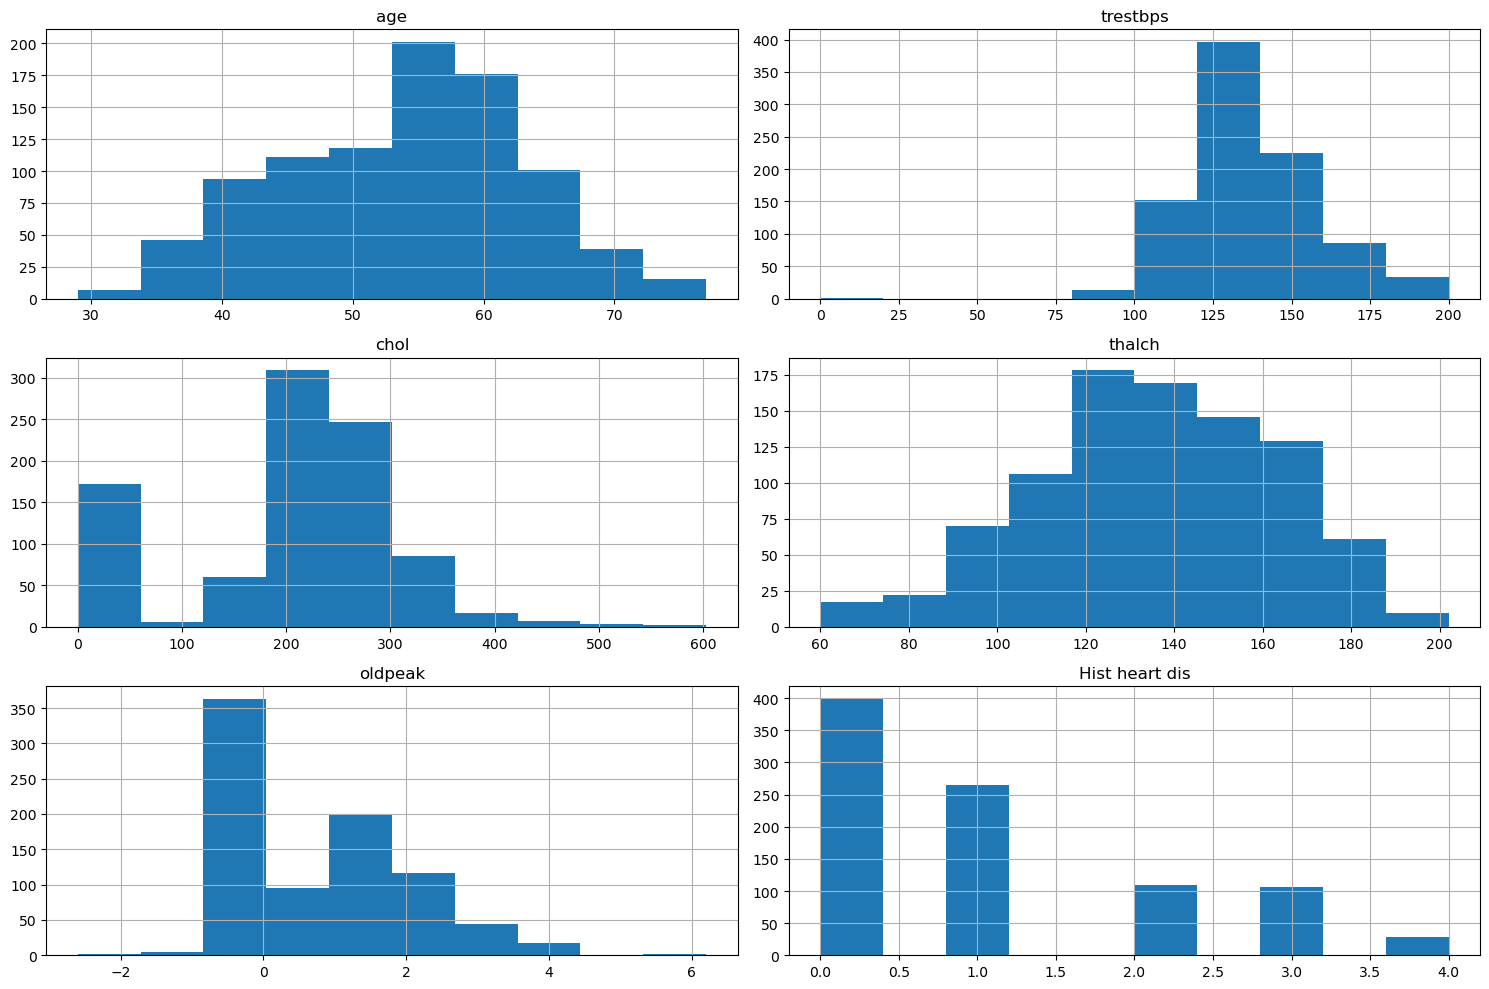

In [42]:
heart.hist(figsize=(15, 10))
plt.title('Hist heart dis')
plt.tight_layout()
plt.show()

Correlation Analysis :

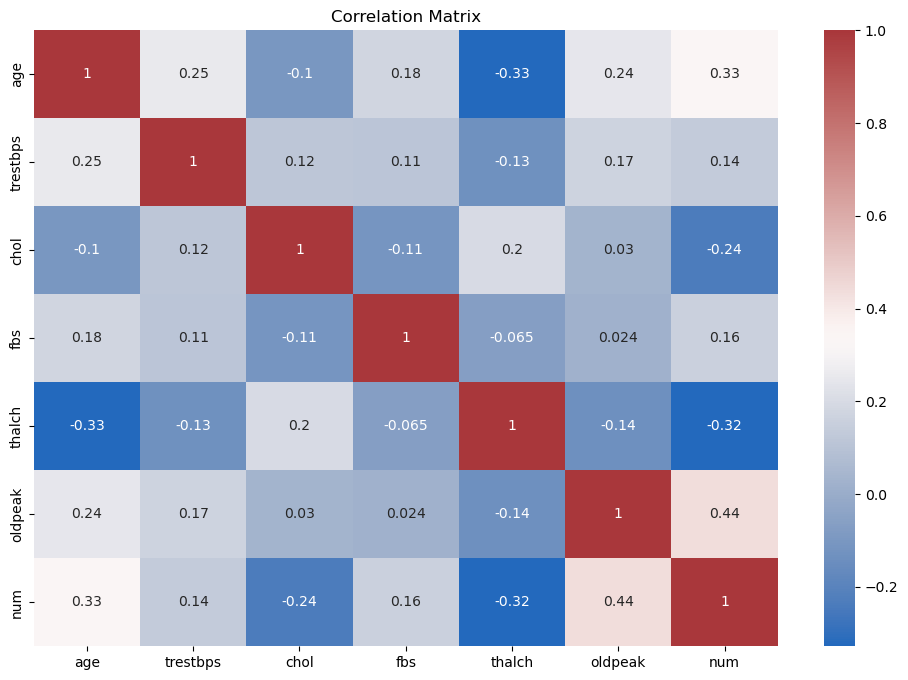

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(heart.corr(numeric_only=True), annot=True, cmap='vlag')
plt.title("Correlation Matrix")
plt.show()

Feature Engineering :

Encode Categorical Variables :

In [71]:
from sklearn.preprocessing import OneHotEncoder

In [74]:
heart_encoding=pd.get_dummies(heart,columns=['sex','cp','fbs','restecg','exang','slope','thal'],drop_first=True)
heart_encoding

,age,trestbps,chol,thalch,oldpeak,num,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,True,False,False,True,True,False,False,False,False,False,False,False,False,False
1,41,135,203,132,0.0,0,True,True,False,False,False,True,False,False,False,False,True,False,False,False
2,57,140,192,148,0.4,0,True,False,False,False,False,True,False,False,False,False,True,False,False,False
3,52,118,186,190,0.0,0,True,False,False,True,False,False,False,False,False,False,True,False,False,False
4,57,110,201,126,1.5,0,True,False,False,False,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,120,1.5,4,True,False,False,False,False,True,False,False,False,False,False,True,False,False
904,62,166,170,120,3.0,4,True,False,False,False,False,False,True,True,False,False,True,False,True,False
905,56,170,0,123,2.5,4,True,False,True,False,False,False,False,True,False,False,False,False,False,False
906,56,144,208,105,NaN,4,True,False,True,False,True,False,True,False,False,True,False,False,False,True


In [75]:
heart_encoding.dtypes

age                         int64
trestbps                    int64
chol                        int64
thalch                      int64
oldpeak                   float64
num                         int64
sex_1                        bool
cp_1                         bool
cp_2                         bool
cp_3                         bool
fbs_1                        bool
restecg_1                    bool
restecg_2                    bool
exang_True                   bool
exang_FALSE                  bool
exang_TURE                   bool
slope_flat                   bool
slope_upsloping              bool
thal_normal                  bool
thal_reversable defect       bool
dtype: object

Feature Split :


In [76]:
X = heart_encoding.drop('num', axis=1)
y = heart_encoding['num']

Train Test Split :

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Build the model :

In [78]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42)

In [79]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
y_pred=dtc.predict(X_test)

Evaluate The model :


In [83]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print("accuracy_score",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        89
           1       0.40      0.50      0.44        48
           2       0.45      0.23      0.30        22
           3       0.33      0.35      0.34        17
           4       0.00      0.00      0.00         6

    accuracy                           0.53       182
   macro avg       0.38      0.36      0.36       182
weighted avg       0.54      0.53      0.53       182

accuracy_score 0.532967032967033


In [100]:
from sklearn.metrics import roc_auc_score

y_prob = dtc.predict_proba(X_test)

roc_auc = roc_auc_score(
    y_test,
    y_prob,
    multi_class='ovr',
    average='weighted'
)

print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.6565685137363039


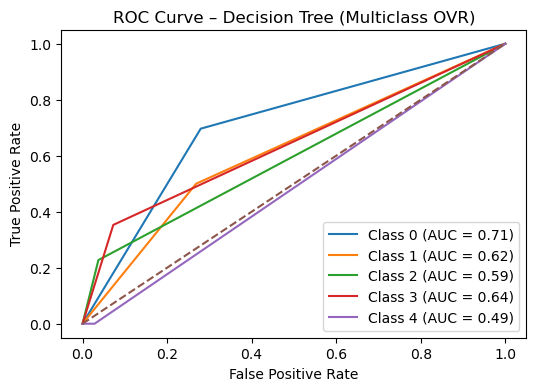

In [104]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)


y_prob = dtc.predict_proba(X_test)

plt.figure(figsize=(6,4))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Decision Tree (Multiclass OVR)")
plt.legend()
plt.show()


Hyperparamter Tuning :

In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


Model Evaluation & Analysis :

In [111]:
#Model Performance Analysis

#The Decision Tree model’s performance was evaluated using Accuracy, Precision, Recall, F1-score, and ROC-AUC.
#The results indicate how well the model distinguishes between different heart disease classes.
#Precision and Recall values show the model’s effectiveness in correctly identifying disease cases.
#ROC-AUC demonstrates the model’s ability to separate classes across different thresholds.


#Decision Tree Visualization

#The visualized decision tree shows the decision rules learned from the data.
#Each internal node represents a feature-based split, while leaf nodes represent predicted classes.
#Features appearing near the top of the tree have higher importance in classification decisions.

#Important Features

#Feature importance analysis highlights the most influential variables in predicting heart disease.
#These features contribute the most to impurity reduction and model decisions.

Decision Tree Visualization :

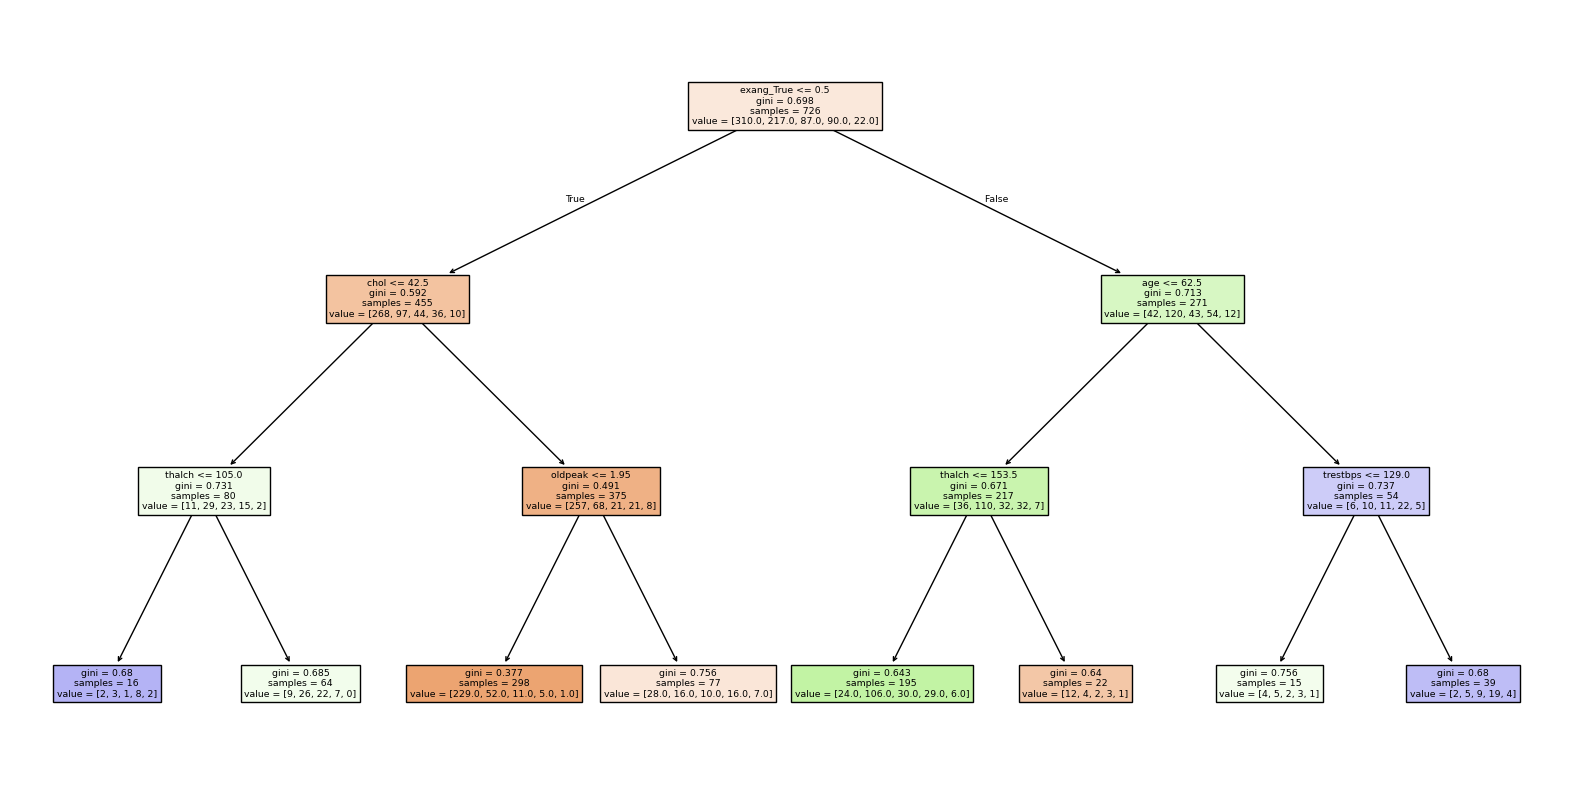

In [108]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    best_model,
    feature_names=X.columns,
    filled=True
)
plt.show()


Feature_importances :

exang_True                0.424968
chol                      0.256368
oldpeak                   0.128304
thalch                    0.096101
age                       0.075305
trestbps                  0.018955
sex_1                     0.000000
cp_2                      0.000000
cp_3                      0.000000
fbs_1                     0.000000
cp_1                      0.000000
restecg_1                 0.000000
restecg_2                 0.000000
exang_FALSE               0.000000
exang_TURE                0.000000
slope_flat                0.000000
slope_upsloping           0.000000
thal_normal               0.000000
thal_reversable defect    0.000000
dtype: float64


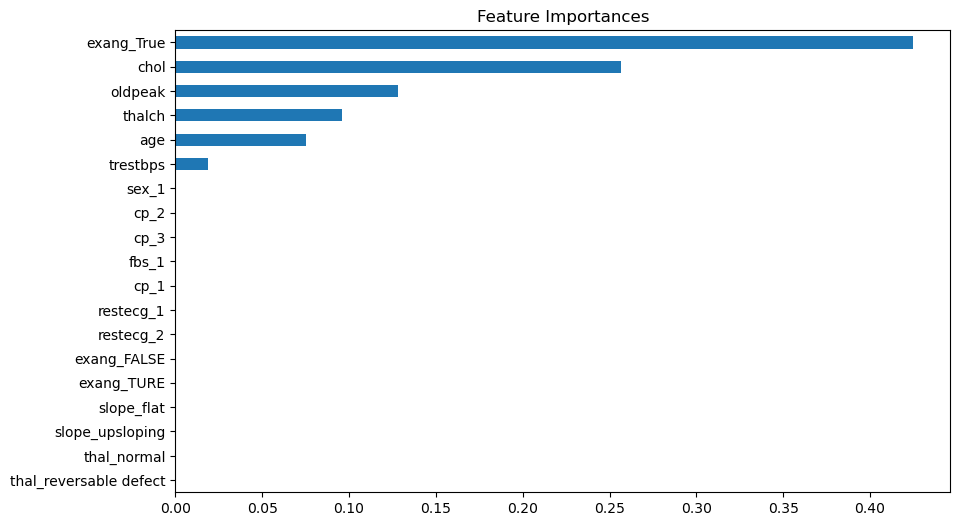

In [110]:


feature_importances = pd.Series(
    best_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(feature_importances)

feature_importances.plot(
    kind='barh',
    figsize=(10, 6),
    title='Feature Importances'
)
plt.gca().invert_yaxis()
plt.show()


In [113]:
#Interview Questions:

#1. Common Hyperparameters of Decision Trees :

#max_depth: Controls the maximum depth of the tree; prevents overfitting.
#min_samples_split: Minimum samples required to split a node.
#criterion: Measure of split quality (gini or entropy).
#min_samples_leaf: Minimum samples required at a leaf node.

#2. Label Encoding vs One-Hot Encoding

#Label Encoding :
#converts categories into integer values.
#Suitable for ordinal data
#May introduce false ranking if used on nominal data.

#One-Hot Encoding :
#It creates separate binary columns for each category.
#One-Hot Encoding avoids introducing unintended ordinal relationships.
#Suitable for nominal data